In [1]:
import torchvision
import torch
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2
from torch.utils.data import DataLoader
from torchvision import datasets
import pycocotools
from torchvision.datasets import CocoDetection
from pycocotools.coco import COCO
from matplotlib.patches import Rectangle
import random
from PIL import Image
from ultralytics import YOLO
import math
import torchvision.models.detection as detection

In [2]:
train_path = 'Dataset/train2017/train2017'
val_path = 'Dataset/val2017/val2017'

In [3]:
image_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(train_path) for f in filenames if f.endswith(('.png', 
                                                                                                                  '.jpg', 
                                                                                                                  '.jpeg'))]

In [4]:
def display_images(image_files, num_images):
    plt.figure(figsize=(15,20))
    for i in range(num_images):
        img_path = np.random.choice(image_files)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

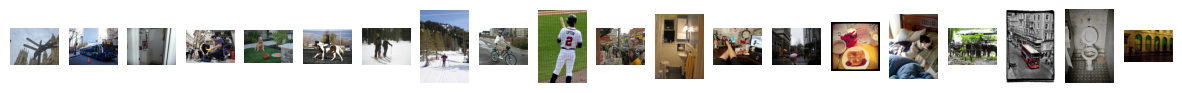

In [5]:
display_images(image_files, 20)

In [ ]:
image_dimensions = []
for img_path in image_files:
    img = cv2.imread(img_path)
    dimensions = img.shape 
    image_dimensions.append(dimensions)

In [8]:
image_dimensions

[(480, 640, 3),
 (426, 640, 3),
 (428, 640, 3),
 (425, 640, 3),
 (640, 481, 3),
 (478, 640, 3),
 (500, 381, 3),
 (488, 640, 3),
 (640, 480, 3),
 (426, 640, 3),
 (640, 427, 3),
 (640, 565, 3),
 (426, 640, 3),
 (375, 500, 3),
 (612, 612, 3),
 (425, 640, 3),
 (640, 512, 3),
 (480, 640, 3),
 (427, 640, 3),
 (427, 640, 3),
 (416, 640, 3),
 (480, 640, 3),
 (640, 416, 3),
 (481, 640, 3),
 (480, 640, 3),
 (374, 500, 3),
 (573, 640, 3),
 (640, 480, 3),
 (500, 600, 3),
 (480, 640, 3),
 (428, 640, 3),
 (640, 480, 3),
 (640, 427, 3),
 (480, 640, 3),
 (536, 640, 3),
 (480, 640, 3),
 (480, 640, 3),
 (480, 640, 3),
 (428, 640, 3),
 (480, 640, 3),
 (640, 480, 3),
 (424, 640, 3),
 (480, 640, 3),
 (480, 640, 3),
 (333, 500, 3),
 (640, 591, 3),
 (640, 428, 3),
 (427, 640, 3),
 (480, 640, 3),
 (426, 640, 3),
 (600, 600, 3),
 (427, 640, 3),
 (427, 640, 3),
 (480, 640, 3),
 (481, 640, 3),
 (427, 640, 3),
 (491, 640, 3),
 (480, 640, 3),
 (327, 640, 3),
 (480, 640, 3),
 (218, 640, 3),
 (332, 500, 3),
 (375, 5

In [6]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

In [7]:
import pycocotools
from torchvision.datasets import CocoDetection
train_dataset = CocoDetection(root='Dataset/train2017/train2017',
                              annFile='Dataset/annotations_trainval2017/annotations/instances_train2017.json',
                              transform=transform)

loading annotations into memory...
Done (t=17.63s)
creating index...
index created!


In [8]:
test_dataset = CocoDetection(root='Dataset/val2017/val2017',
                            annFile='Dataset/annotations_trainval2017/annotations/instances_val2017.json',
                            transform=transform)

loading annotations into memory...
Done (t=0.59s)
creating index...
index created!


In [9]:
train_loader = DataLoader(
    train_dataset,
    batch_size=2,
    shuffle=True,
    num_workers=2,
)

In [10]:
test_loader = DataLoader(
    test_dataset,
    batch_size=2,
    shuffle=False,
    num_workers=2,
)

In [20]:
from pycocotools.coco import COCO
from matplotlib.patches import Rectangle
import random

In [21]:
data_dir = 'Dataset/annotations_trainval2017'
data_type = 'val2017'
ann_file = os.path.join(data_dir, 'annotations', f'instances_{data_type}.json')

In [22]:
coco = COCO(ann_file)

loading annotations into memory...
Done (t=0.57s)
creating index...
index created!


In [30]:
img_ids = coco.getImgIds()

In [31]:
img_id = random.choice(img_ids)
img_info = coco.loadImgs(img_id)[0]

In [38]:
img_info['file_name']

'000000281929.jpg'

In [39]:
img_path = os.path.join('Dataset/val2017/val2017', img_info['file_name'])

In [45]:
from PIL import Image

In [46]:
img = Image.open(img_path)

In [48]:
max_size = (800,800)
if img.size[0] > max_size[0] or img.size[1] > max_size[1]:
    img.thumbnail(max_size, Image.ANTIALIAS)

In [49]:
img = np.array(img)

(-0.5, 639.5, 503.5, -0.5)

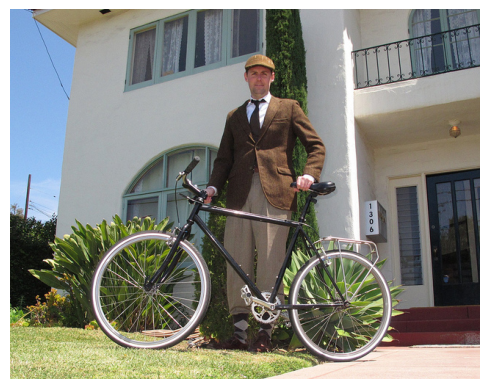

In [50]:
plt.imshow(img)
plt.axis('off')

In [51]:
ann_ids = coco.getAnnIds(imgIds=img_id)
anns = coco.loadAnns(ann_ids)


In [55]:
bbox[0]

256.58

In [57]:
for ann in anns:
    bbox = ann['bbox']
    category_id = ann['category_id']
    category = coco.loadCats(category_id)[0]['name']

    # Scale bounding box if the image was resized
    scale_x = img.shape[1] / img_info['width']
    scale_y = img.shape[0] / img_info['height']
    bbox = [bbox[0] * scale_x, bbox[1] * scale_y, bbox[2] * scale_x, bbox[3] * scale_y]




In [59]:
rect = Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')

In [60]:
rect

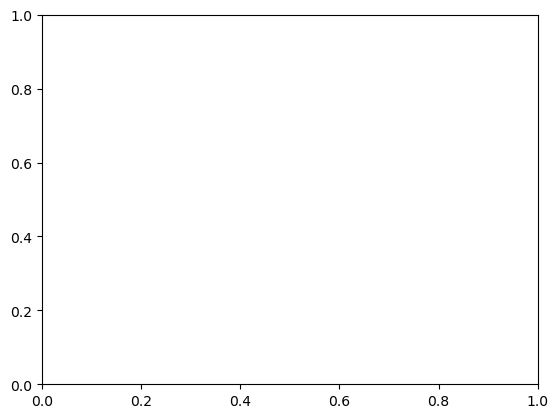

In [61]:
plt.gca().add_patch(rect)

In [64]:
bbox[0], bbox[1] - 2

(256.58, 60.84)

In [14]:
img = cv2.imread('Dataset/train2017/train2017/000000000072.jpg')

In [15]:
cv2.imshow("window",img)
cv2.waitKey(0)

-1

In [16]:
len(train_dataset), len(test_dataset)

(118287, 5000)

In [17]:
image, label = train_dataset[0]

In [18]:
image, label

(tensor([[[0.0078, 0.0039, 0.0039,  ..., 0.5569, 0.5373, 0.5255],
          [0.0039, 0.0039, 0.0078,  ..., 0.5686, 0.5490, 0.5333],
          [0.0039, 0.0000, 0.0000,  ..., 0.5686, 0.5490, 0.5373],
          ...,
          [0.0275, 0.0510, 0.0784,  ..., 0.2549, 0.1922, 0.0745],
          [0.0235, 0.0431, 0.0667,  ..., 0.1020, 0.0431, 0.0196],
          [0.0196, 0.0353, 0.0549,  ..., 0.0235, 0.0157, 0.0157]],
 
         [[0.0902, 0.0863, 0.0902,  ..., 0.6941, 0.6824, 0.6706],
          [0.0824, 0.0863, 0.0902,  ..., 0.7020, 0.6941, 0.6784],
          [0.0863, 0.0941, 0.0980,  ..., 0.7098, 0.6980, 0.6941],
          ...,
          [0.0078, 0.0275, 0.0588,  ..., 0.3529, 0.2863, 0.1294],
          [0.0039, 0.0196, 0.0510,  ..., 0.1725, 0.0980, 0.0431],
          [0.0039, 0.0157, 0.0314,  ..., 0.0627, 0.0353, 0.0157]],
 
         [[0.4314, 0.4392, 0.4510,  ..., 0.8000, 0.7843, 0.7725],
          [0.4353, 0.4431, 0.4549,  ..., 0.8078, 0.7961, 0.7804],
          [0.4431, 0.4431, 0.4549,  ...,

In [23]:
categories = coco.loadCats(coco.getCatIds())
class_names = [cat['name'] for cat in categories]

In [24]:
class_names

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [25]:
len(class_names)

80

In [26]:
class_to_idx = {cat['name']: cat['id'] for cat in categories}

In [27]:
class_to_idx

{'person': 1,
 'bicycle': 2,
 'car': 3,
 'motorcycle': 4,
 'airplane': 5,
 'bus': 6,
 'train': 7,
 'truck': 8,
 'boat': 9,
 'traffic light': 10,
 'fire hydrant': 11,
 'stop sign': 13,
 'parking meter': 14,
 'bench': 15,
 'bird': 16,
 'cat': 17,
 'dog': 18,
 'horse': 19,
 'sheep': 20,
 'cow': 21,
 'elephant': 22,
 'bear': 23,
 'zebra': 24,
 'giraffe': 25,
 'backpack': 27,
 'umbrella': 28,
 'handbag': 31,
 'tie': 32,
 'suitcase': 33,
 'frisbee': 34,
 'skis': 35,
 'snowboard': 36,
 'sports ball': 37,
 'kite': 38,
 'baseball bat': 39,
 'baseball glove': 40,
 'skateboard': 41,
 'surfboard': 42,
 'tennis racket': 43,
 'bottle': 44,
 'wine glass': 46,
 'cup': 47,
 'fork': 48,
 'knife': 49,
 'spoon': 50,
 'bowl': 51,
 'banana': 52,
 'apple': 53,
 'sandwich': 54,
 'orange': 55,
 'broccoli': 56,
 'carrot': 57,
 'hot dog': 58,
 'pizza': 59,
 'donut': 60,
 'cake': 61,
 'chair': 62,
 'couch': 63,
 'potted plant': 64,
 'bed': 65,
 'dining table': 67,
 'toilet': 70,
 'tv': 72,
 'laptop': 73,
 'mouse'

In [34]:
def display_images(image_files, num_images, figsize=(20, 20)):
    fig, axes = plt.subplots(1, num_images, figsize=figsize)
    for i in range(num_images):
        img_path = np.random.choice(image_files)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.show()

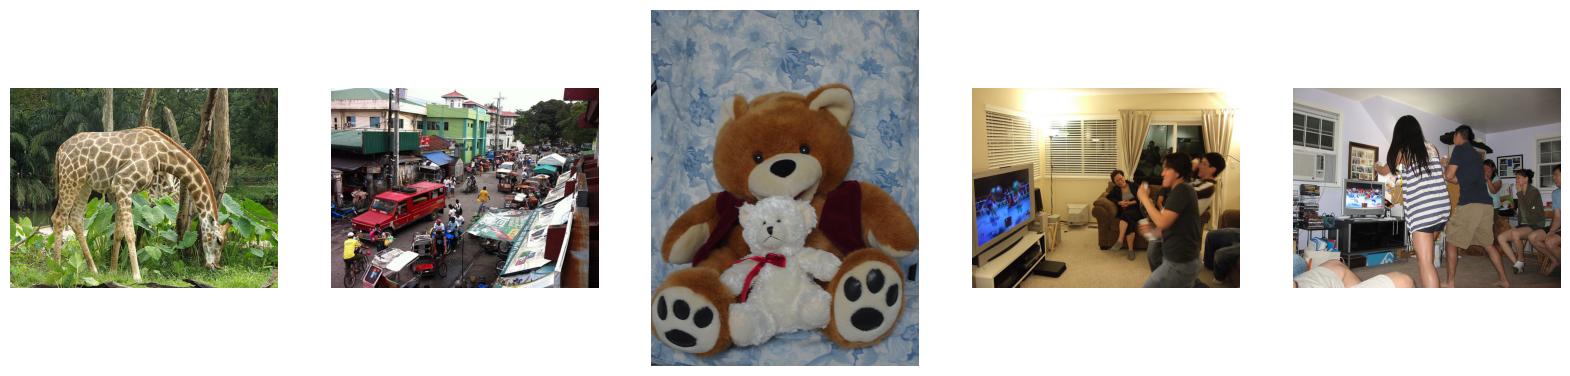

In [36]:
display_images(image_files, 5)

In [37]:

def show_images_of_class(class_name, num_images, class_to_idx, training_labels, training_images):
    # get class label
    class_label = class_to_idx[class_name]

    # get images with class label
    imgs = np.nonzero(training_labels == class_label)[0]

    # grid of rows by columns
    columns = 5
    rows = num_images // columns

    # Display the first num_images examples of the class
    plt.figure(figsize=(15, rows * 3))  # Adjust the height dynamically
    for j, img in enumerate(imgs[:num_images]):
        plt.subplot(rows, columns, j + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(training_images[img])
    plt.show()

# Example usage
# Assuming you have a dictionary called class_to_idx, arrays called training_labels and training_images
# show_images_of_class('some_class_name', 15, class_to_idx, training_labels, training_images)


In [39]:
def display_images(image_files, num_images, columns=5):
    rows = num_images // columns + (num_images % columns > 0)  # Calculate rows needed
    fig = plt.figure(figsize=(20, rows * 4))  # Increase the figure size for larger images
    
    for i in range(num_images):
        img_path = np.random.choice(image_files)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        ax = fig.add_subplot(rows, columns, i + 1)
        ax.imshow(img)
        ax.axis('off')  # Remove axis ticks
    
    plt.tight_layout()  # Adjust subplots to fit in figure area
    plt.show()

In [44]:
training_images = []
training_labels = []

In [49]:
categories = coco.loadCats(coco.getCatIds())
class_to_idx = {cat['name']: cat['id'] for cat in categories}


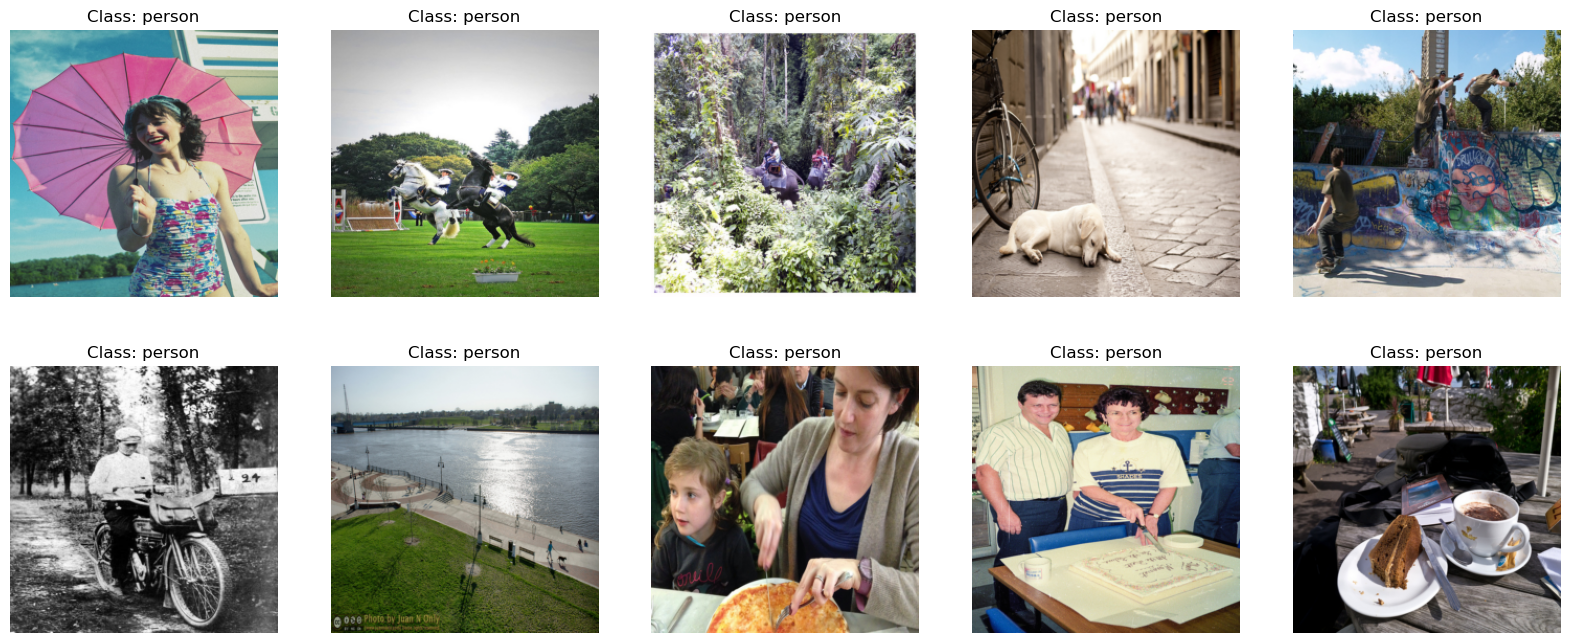

In [50]:
 def show_images_of_class(class_name, num_images, class_to_idx, dataset, batch_size=100):
    # get class label
    class_label = class_to_idx[class_name]

    # List to hold images to display
    images_to_show = []

    # Process dataset in batches
    for start_idx in range(0, len(dataset), batch_size):
        end_idx = min(start_idx + batch_size, len(dataset))
        for idx in range(start_idx, end_idx):
            img, target = dataset[idx]
            labels = [ann['category_id'] for ann in target]
            if class_label in labels:
                images_to_show.append(img.numpy())
            
            if len(images_to_show) >= num_images:
                break
        
        if len(images_to_show) >= num_images:
            break

    # Display images
    columns = 5
    rows = num_images // columns + (num_images % columns > 0)  # Ensure enough rows to display all images

    plt.figure(figsize=(20, rows * 4))  # Adjust the height dynamically
    for j, img in enumerate(images_to_show[:num_images]):
        ax = plt.subplot(rows, columns, j + 1)
        ax.imshow(np.transpose(img, (1, 2, 0)))
        ax.axis('off')  # Remove axis ticks
        ax.set_title(f"Class: {class_name}")
    plt.show()

# Example usage
show_images_of_class('person', 10, class_to_idx, train_dataset)

In [1]:
from ultralytics import YOLO

In [7]:
image_folder = "Dataset/val2017/val2017"

In [8]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # filter by file extensions
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path)
            if img is not None:
                images.append(img)
    return images

In [9]:
images = load_images_from_folder(image_folder)

In [10]:
transform = transforms.ToTensor()
wow = transform(images)

TypeError: pic should be PIL Image or ndarray. Got <class 'list'>